# A Standard Virus Load Function

Here we consider a virus load function with three main phases given by

$$V(t)=v_1(t)v_2(t)v_3(t),$$

where $v _1$ describes the initial growth phase between $a _1$ and $a _2$ , $v _2$ the intermediate slow decay
phase between $a _2$ and $b _1$, and $v _3$ the final decay phase between $b _1$ and $b _2$. These functions are given as sigmoid and exponential functions, respectively

$$
\begin{aligned}
v_1(t) & = 1 + \frac{\max - 1}{2} \left[ \tanh \left( \frac{6}{a_2 - a_1} \left( t - \frac{a_1 + a_2}{2} \right) - \tanh  \left( -3\frac{a_2 + a_1}{a_2 - a_1} \right) \right) \right] \\
v_2(t) & = (1 - H(t - a_2)) + H(t - a_2)e^{-\alpha(t - a_2)} \\
v_3(t) & = 1 - \frac{1 - \min}{2} \left[ \tanh \left( \frac{6}{b_2 - b_1} \left( t - \frac{b_1 + b_2}{2} \right) - \tanh  \left( -3\frac{b_2 + b_1}{b_2 - b_1} \right) \right) \right],
\end{aligned}
$$

where $H(t)$ denotes the Heaviside function.



A typical virus load curve is shown bellow with the corresponding times. 

![VirusLoadCurves](figures/notebooks/VirusLoadCurves.png)



In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from VirusLoadFunction import VirusLoadFunction

## Data
Using data from Smith et al. (2018), *Frontier in Microbiology*.

In [4]:
lines = open('../../data/Smith2018/Virus_Best10.txt').readlines()
data = []
for line in lines:
    data.append(np.array([float(p) for p in line.split(' ')]))

In [16]:
avgdata = np.zeros(len(data))
for vdata in data:
    avgdata = avgdata

array([0.     , 3.99136, 5.47712, 5.84488, 5.82436, 5.81012, 5.0874 ,
       4.49136, 0.     , 0.     , 0.     , 0.     , 0.     ])

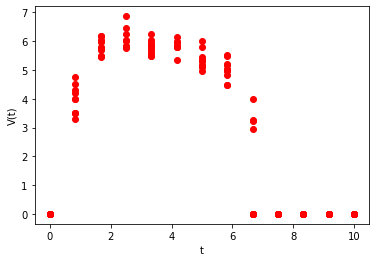

In [8]:
tdata = np.linspace(0, 10, len(data[0]))
for vdata in data:
    plt.plot(tdata, vdata, 'ro')
plt.xlabel('t')
plt.ylabel('V(t)')
plt.show()

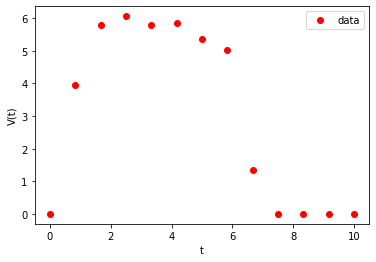

In [26]:
# vl = VirusLoadFunction(tdata, data[0])
vl = VirusLoadFunction(tdata, np.average(data, axis=0))
vl.Plot()

[10.0, 10.0, 10.0, 10.0, 10.0, 10.0, 100000000.0]
[0.5, 2.0, 6.0, 9.0, 0.2, 1e-06, 1000000.0]


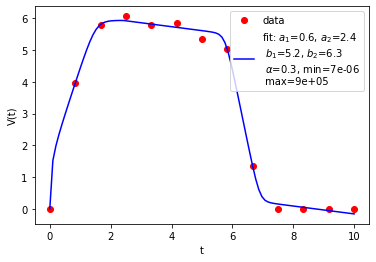

In [27]:
vl.InitialGuess(0.5, 2., 6., 9., 0.2, 1e-6, 1e6)
vl.Fit()
vl.Plot()